In [2]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
from matplotlib import pylab as plt

import warnings
warnings.filterwarnings('ignore')
sns.set_palette(['#0892a5','#2e9b9b','#50a290','#6fa985','#8dad7f','#a9b17e','#c4b383','#dbb68f'])
# Create a list of the paths to the 12 CSV files
#csv_file_paths = ["Sales_April.csv","Sales_August.csv","Sales_December.csv","Sales_February.csv","Sales_January.csv","Sales_July.csv","Sales_June.csv","Sales_March.csv","Sales_May.csv","Sales_November.csv","Sales_October.csv","Sales_September.csv"]

# Read each CSV file into a Pandas DataFrame
#dataframes = []
#for file_path in csv_file_paths:
  #  dataframe = pd.read_csv(file_path)
  #  dataframes.append(dataframe)

# Concatenate the DataFrames into a single DataFrame
#combined_dataframe = pd.concat(dataframes)

# Save the concatenated DataFrame to a new CSV file
#combined_dataframe.to_csv("combined_csv_file.csv", index=False)*/


In [3]:
df=pd.read_csv("combined_csv_file.csv")

In [4]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [5]:
df = df[df['Order ID'] != 'Order ID']

In [6]:
df = df.reset_index()
df = df.drop(columns='index')

In [7]:
df.sample(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
159257,263894,Lightning Charging Cable,1,14.95,10/18/19 14:12,"415 9th St, Austin, TX 73301"
69564,143246,Bose SoundSport Headphones,1,99.99,01/15/19 08:48,"932 Maple St, Portland, OR 97035"
96187,214392,20in Monitor,1,109.99,06/20/19 17:01,"969 River St, Seattle, WA 98101"
74419,147877,AAA Batteries (4-pack),1,2.99,01/31/19 00:54,"685 Forest St, Austin, TX 73301"
14138,190064,AAA Batteries (4-pack),3,2.99,04/27/19 21:36,"542 Meadow St, San Francisco, CA 94016"


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186521 entries, 0 to 186520
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
dtypes: object(6)
memory usage: 8.5+ MB


In [9]:
df.isna().sum()

Order ID            571
Product             571
Quantity Ordered    571
Price Each          571
Order Date          571
Purchase Address    571
dtype: int64

In [10]:
df[df.isna().any(axis=1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
734,NaN,NaN,NaN,NaN,NaN,NaN
1430,NaN,NaN,NaN,NaN,NaN,NaN
1550,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
184851,NaN,NaN,NaN,NaN,NaN,NaN
185113,NaN,NaN,NaN,NaN,NaN,NaN
185716,NaN,NaN,NaN,NaN,NaN,NaN
186222,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df= df.dropna()

In [12]:
df['Quantity Ordered'] = df['Quantity Ordered'].astype('float')
df['Price Each'] = df['Price Each'].astype('float')
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [13]:
#Adding new feature
def feature_extraction(data):
    
    # funtction to get the city in the data
    def get_city(address):
        return address.split(',')[1]
    
    # funtction to get the state in the data
    def get_state(address):
        return address.split(',')[2].split(' ')[1]

    # let's get the year data in order date column
    data['Year'] = data['Order Date'].dt.year
    
    # let's get the month data in order date column
    data['Month'] = data['Order Date'].dt.month
    
    # let's get the houe data in order date column
    data['Hour'] = data['Order Date'].dt.hour 
    
    # let's get the minute data in order date column
    data['Minute'] = data['Order Date'].dt.minute 
    
    # let's make the sales column by multiplying the quantity ordered colum with price each column
    data['Sales'] = data['Quantity Ordered'] * data['Price Each'] 
    
    # let's get the cities data in order date column
    data['Cities'] = data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})") 
    
    return data 

In [14]:
df = feature_extraction(df)
df.sample(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Month,Hour,Minute,Sales,Cities
119520,175827,Apple Airpods Headphones,1.0,150.00,2019-03-31 08:17:00,"499 Willow St, Boston, MA 02215",2019,3,8,17,150.00,Boston (MA)
149874,291235,Apple Airpods Headphones,1.0,150.00,2019-11-09 09:22:00,"577 Cherry St, Portland, ME 04101",2019,11,9,22,150.00,Portland (ME)
30175,247979.0,Lightning Charging Cable,1.0,14.95,2019-08-23 19:02:00,"573 Hill St, Austin, TX 73301",2019,8,19,2,14.95,Austin (TX)


In [15]:
df.describe()

,Quantity Ordered,Price Each,Year,Month,Hour,Minute,Sales
count,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000
mean,1.124383,184.399735,2019.000183,7.059140,14.413305,29.481361,185.490917
std,0.442793,332.731330,0.013521,3.502996,5.423416,17.317573,332.919771
min,1.000000,2.990000,2019.000000,1.000000,0.000000,0.000000,2.990000
25%,1.000000,11.950000,2019.000000,4.000000,11.000000,14.000000,11.950000
50%,1.000000,14.950000,2019.000000,7.000000,15.000000,29.000000,14.950000
75%,1.000000,150.000000,2019.000000,10.000000,19.000000,45.000000,150.000000
max,9.000000,1700.000000,2020.000000,12.000000,23.000000,59.000000,3400.000000


In [16]:
df = df[df['Year']==2019]

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185916 entries, 0 to 186520
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185916 non-null  object        
 1   Product           185916 non-null  object        
 2   Quantity Ordered  185916 non-null  float64       
 3   Price Each        185916 non-null  float64       
 4   Order Date        185916 non-null  datetime64[ns]
 5   Purchase Address  185916 non-null  object        
 6   Year              185916 non-null  int64         
 7   Month             185916 non-null  int64         
 8   Hour              185916 non-null  int64         
 9   Minute            185916 non-null  int64         
 10  Sales             185916 non-null  float64       
 11  Cities            185916 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 18.4+ MB


In [18]:
total_year_order = df.shape[0]
total_product_sold = df['Quantity Ordered'].sum()
total_year_sales = df['Sales'].sum()

print(f'Total orders in 2019 : {total_year_order:,} orders')
print(f'Total products sold in 2019 : {total_product_sold:,} items')
print(f'Total sales in 2019 : {total_year_sales:,} USD')

Total orders in 2019 : 185,916 orders
Total products sold in 2019 : 209,038.0 items
Total sales in 2019 : 34,483,365.68 USD


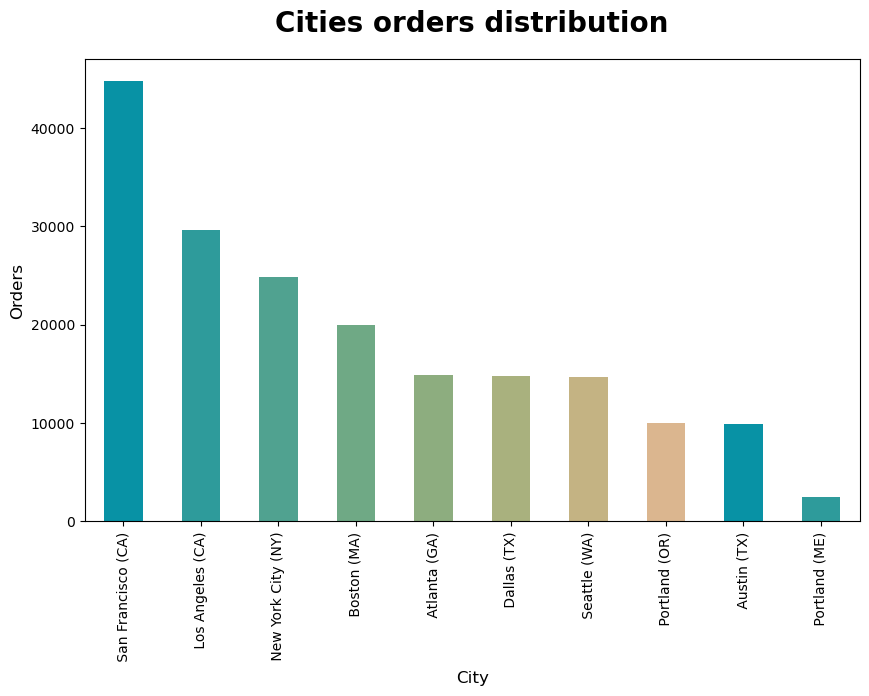

In [19]:
plt.figure(figsize=(10,6))

df['Cities'].value_counts().plot(kind='bar',color=['#0892a5','#2e9b9b','#50a290','#6fa985','#8dad7f','#a9b17e','#c4b383','#dbb68f'])
# sns.countplot(df['Cities'])
plt.title('Cities orders distribution',weight='bold',fontsize=20,pad=20)
plt.ylabel('Orders',fontsize=12)
plt.xlabel('City',fontsize=12)
plt.show()

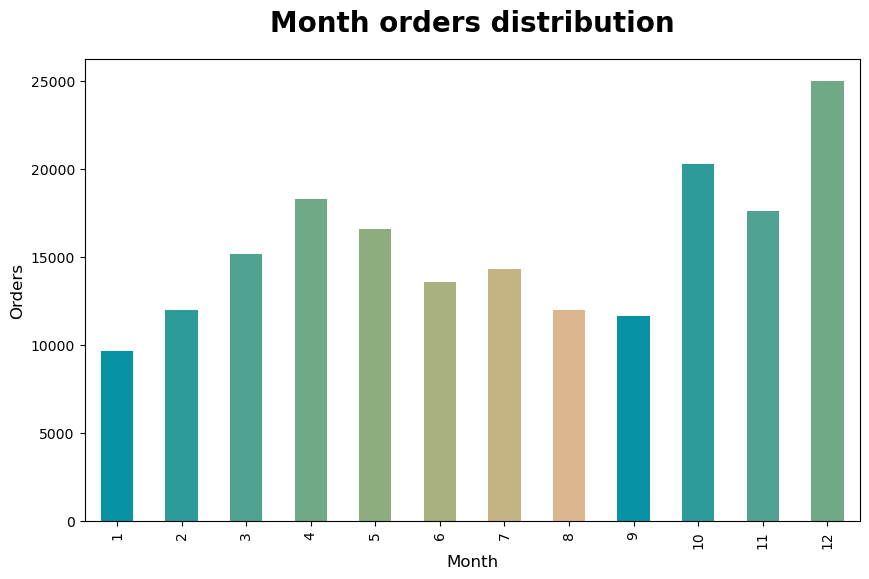

In [20]:
plt.figure(figsize=(10,6))
df['Month'].value_counts().sort_index().plot(kind='bar',color=['#0892a5','#2e9b9b','#50a290','#6fa985','#8dad7f','#a9b17e','#c4b383','#dbb68f'])
plt.title('Month orders distribution',weight='bold',fontsize=20,pad=20)
plt.ylabel('Orders',fontsize=12)
plt.xlabel('Month',fontsize=12)
plt.show()

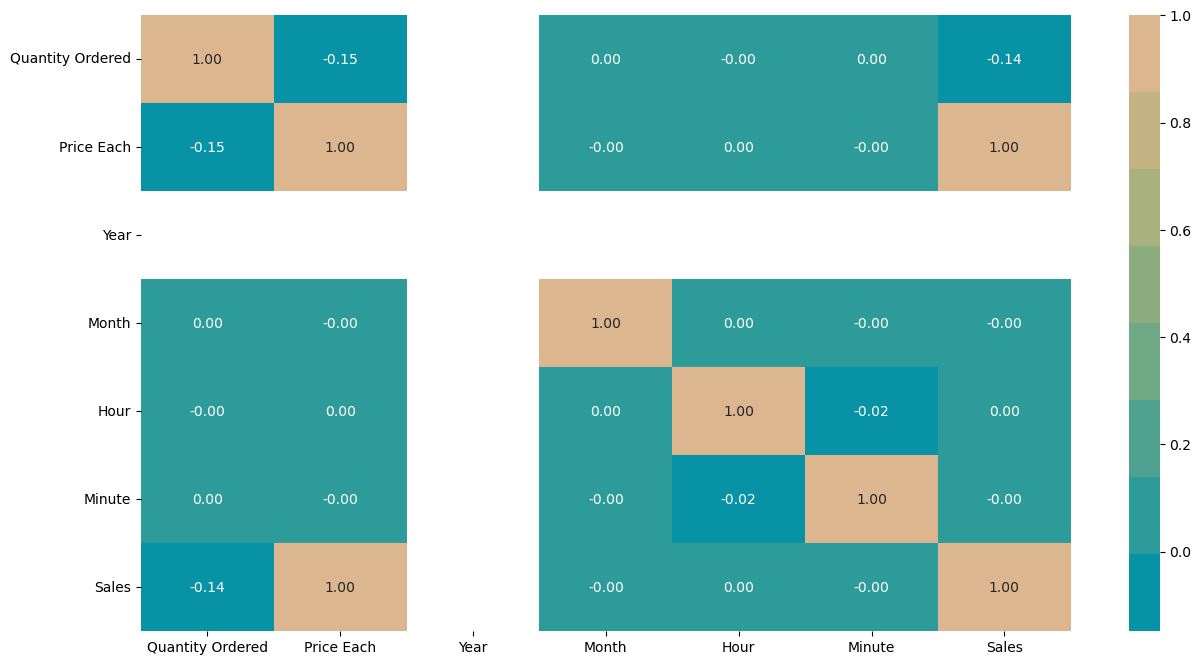

In [21]:
plt.figure(figsize=(15,8))

sns.heatmap(df.corr(), annot=True, fmt='.2f',cmap=['#0892a5','#2e9b9b','#50a290','#6fa985','#8dad7f','#a9b17e','#c4b383','#dbb68f'])
plt.show()

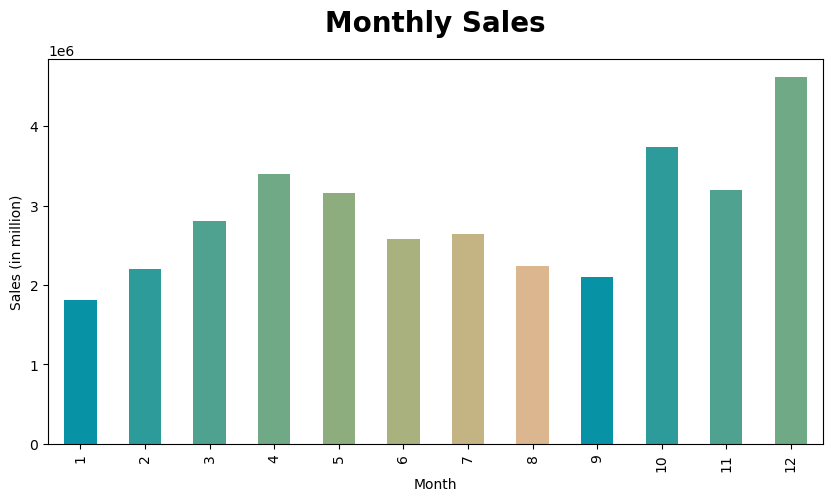

In [22]:
df_month = df.groupby('Month')['Sales'].sum()
plt.figure(figsize=(10,5))
df_month.plot(kind='bar',color=['#0892a5','#2e9b9b','#50a290','#6fa985','#8dad7f','#a9b17e','#c4b383','#dbb68f'])
plt.title('Monthly Sales',weight='bold',fontsize=20,pad=20)
plt.ylabel('Sales (in million)')
plt.show()

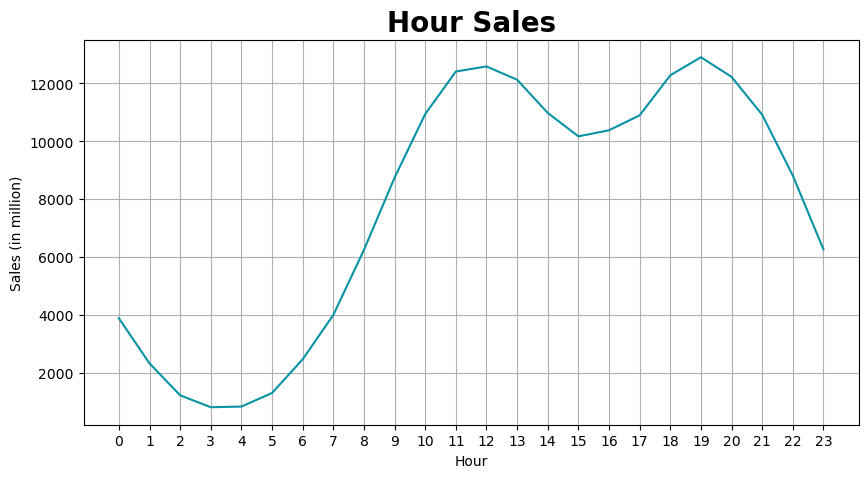

In [23]:
df_hour = df.groupby('Hour')['Quantity Ordered'].count()
plt.figure(figsize=(10,5))
plt.plot(df_hour.index,df_hour.values)
plt.title('Hour Sales',weight='bold',fontsize=20)
plt.grid(True)
plt.xticks(ticks=df_hour.index)
plt.ylabel('Sales (in million)')
plt.xlabel('Hour')


plt.show()

In [24]:
# Define the product categories
categories = {
    "Batteries": ["AA Batteries (4-pack)", "AAA Batteries (4-pack)"],
    "Charging cables": ["Lightning Charging Cable", "USB-C Charging Cable"],
    "Headphones": ["Wired Headphones", "Bose SoundSport Headphones", "Apple Airpods Headphones"],
    "Monitors": ["27in FHD Monitor", "20in Monitor", "34in Ultrawide Monitor", "27in 4K Gaming Monitor"],
    "Smartphones": ["Google Phone", "Vareebadd Phone", "iPhone"],
    "TVs": ["Flatscreen TV"],
    "Laptops": ["ThinkPad Laptop", "Macbook Pro Laptop"],
    "Laundry": ["LG Washing Machine","LG Dryer"],
}

# Function to categorize products
def categorize_product(product):
    for category, products in categories.items():
        if product in products:
            return category
    return "Other"  # Default category for products not in the list

# Apply the categorization function to create a new "Category" column
df["Category"] = df["Product"].apply(categorize_product)

# Display the DataFrame with the new "Category" column
df.sample(60)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Month,Hour,Minute,Sales,Cities,Category
69348,143045,Lightning Charging Cable,1.0,14.95,2019-01-15 09:25:00,"4 Main St, San Francisco, CA 94016",2019,1,9,25,14.95,San Francisco (CA),Charging cables
93306,211647,AAA Batteries (4-pack),1.0,2.99,2019-06-18 17:36:00,"527 Center St, San Francisco, CA 94016",2019,6,17,36,2.99,San Francisco (CA),Batteries
92621,211000,AA Batteries (4-pack),1.0,3.84,2019-06-09 12:41:00,"735 Maple St, Atlanta, GA 30301",2019,6,12,41,3.84,Atlanta (GA),Batteries
59860,154736,27in FHD Monitor,1.0,149.99,2019-02-07 12:22:00,"787 Lake St, Dallas, TX 75001",2019,2,12,22,149.99,Dallas (TX),Monitors
53633,317939,20in Monitor,1.0,109.99,2019-12-29 02:30:00,"538 8th St, San Francisco, CA 94016",2019,12,2,30,109.99,San Francisco (CA),Monitors
46052,310683,AA Batteries (4-pack),1.0,3.84,2019-12-25 21:26:00,"226 14th St, Portland, ME 04101",2019,12,21,26,3.84,Portland (ME),Batteries
50817,315247,USB-C Charging Cable,1.0,11.95,2019-12-13 14:35:00,"178 Willow St, Atlanta, GA 30301",2019,12,14,35,11.95,Atlanta (GA),Charging cables
117061,173465,ThinkPad Laptop,1.0,999.99,2019-03-15 12:34:00,"792 Chestnut St, Los Angeles, CA 90001",2019,3,12,34,999.99,Los Angeles (CA),Laptops
53638,317944,AA Batteries (4-pack),1.0,3.84,2019-12-13 14:20:00,"195 2nd St, Dallas, TX 75001",2019,12,14,20,3.84,Dallas (TX),Batteries
87083,232434,AA Batteries (4-pack),1.0,3.84,2019-07-24 19:41:00,"896 Center St, San Francisco, CA 94016",2019,7,19,41,3.84,San Francisco (CA),Batteries


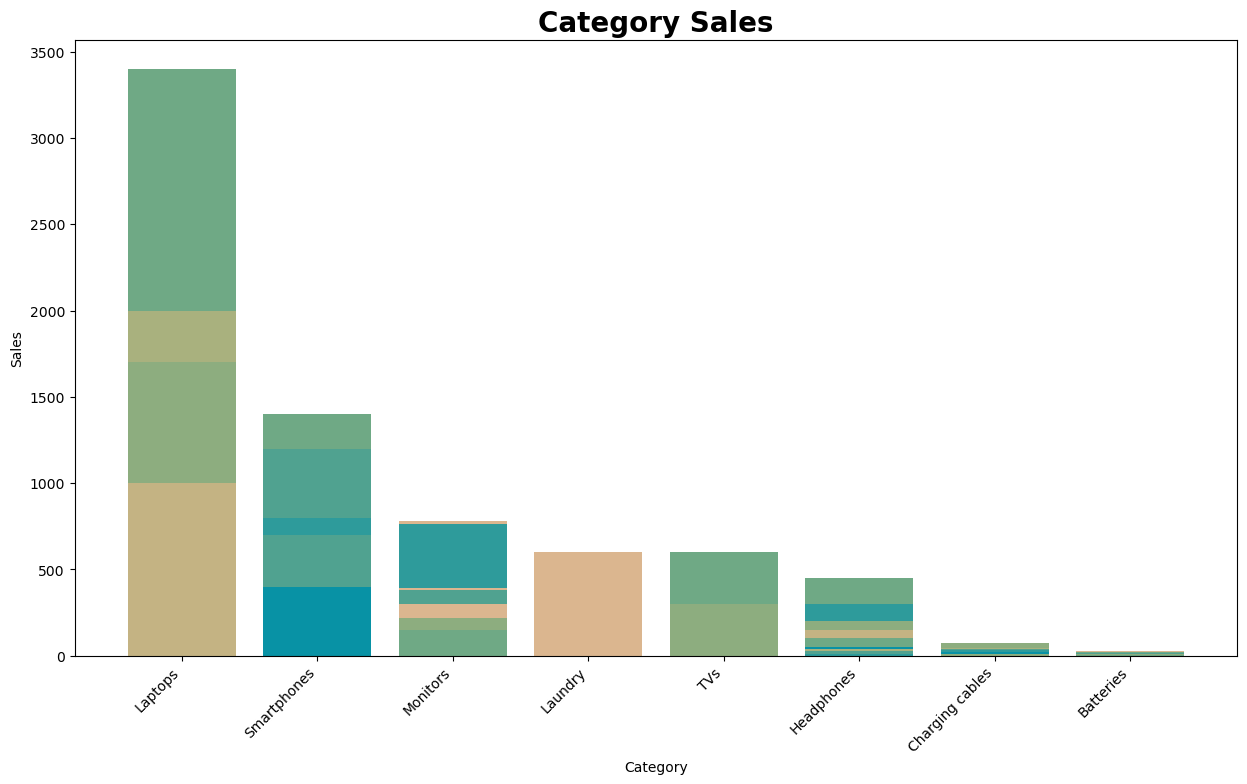

In [25]:
df = df.sort_values(by="Sales", ascending=False)

plt.figure(figsize=(15, 8))
plt.bar(df["Category"], df["Sales"], color=['#0892a5','#2e9b9b','#50a290','#6fa985','#8dad7f','#a9b17e','#c4b383','#dbb68f'])
plt.title('Category Sales', weight='bold', fontsize=20)
plt.xlabel('Category')
plt.ylabel('Sales')
plt.xticks(rotation=45, ha='right')
plt.show()

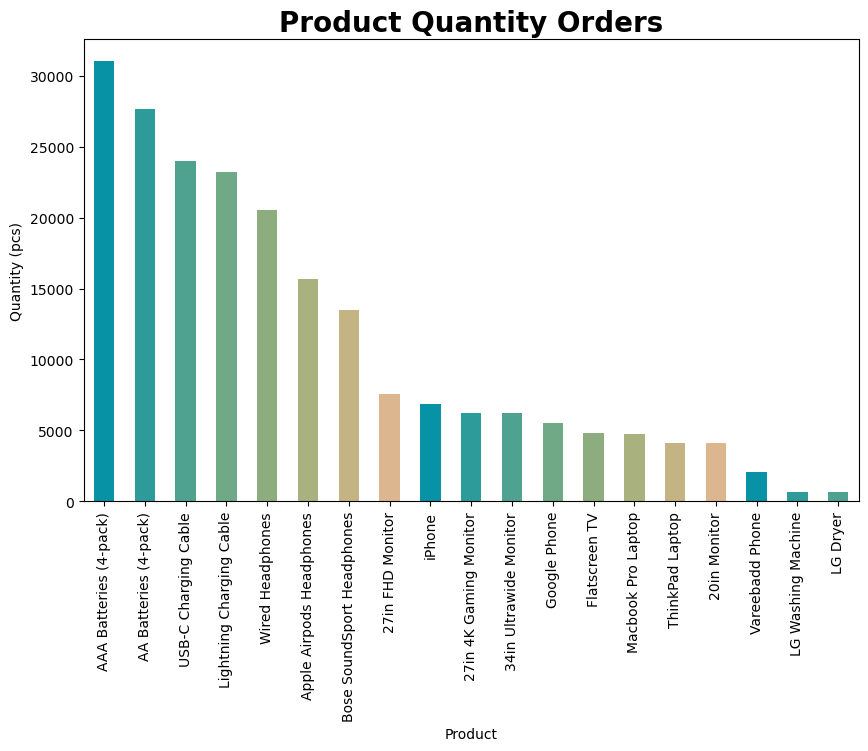

In [26]:
df_product = df.groupby('Product')['Quantity Ordered'].sum()
df_product = df_product.sort_values(ascending=False)

plt.figure(figsize=(10,6))
df_product.plot(kind='bar',color=['#0892a5','#2e9b9b','#50a290','#6fa985','#8dad7f','#a9b17e','#c4b383','#dbb68f'])
plt.title('Product Quantity Orders',weight='bold',fontsize=20)

plt.ylabel('Quantity (pcs)')

plt.show()

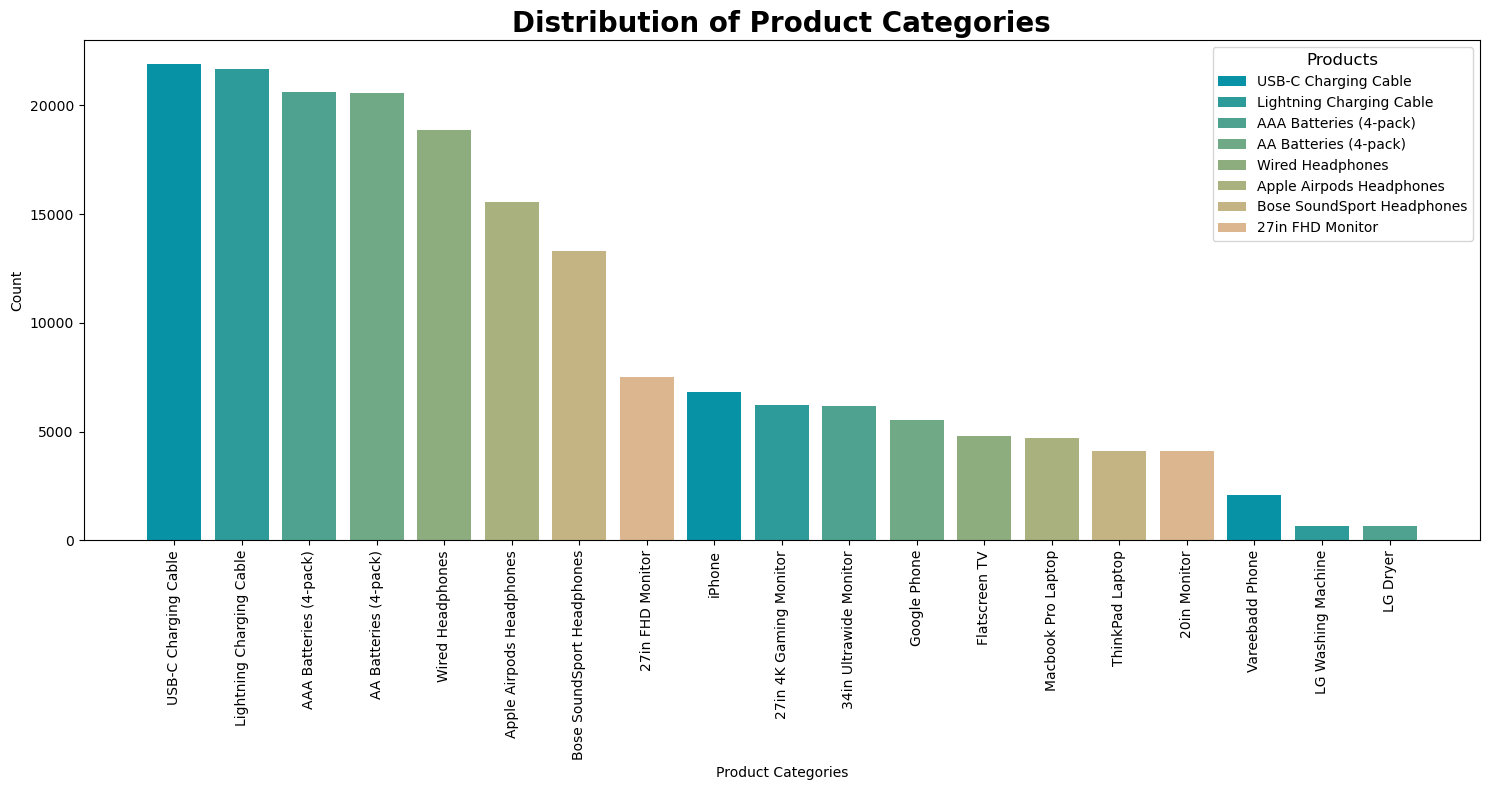

In [27]:
category_counts = df['Product'].value_counts()

# Create a figure and axis
plt.figure(figsize=(15, 8))
ax = plt.gca()

# Plot the bar chart with different colors for each bar
bars = plt.bar(category_counts.index, category_counts.values, color= ['#0892a5','#2e9b9b','#50a290','#6fa985','#8dad7f','#a9b17e','#c4b383','#dbb68f'])

# Add labels and title
plt.xlabel('Product Categories')
plt.ylabel('Count')
plt.title('Distribution of Product Categories',weight='bold',fontsize=20)
plt.xticks(rotation=90)

# Display the chart
plt.tight_layout()

# Optionally, you can add a legend to show the correspondence between colors and categories
legend_labels = category_counts.index[:len(['#0892a5','#2e9b9b','#50a290','#6fa985','#8dad7f','#a9b17e','#c4b383','#dbb68f'])]  # Take labels for the number of colors used
legend = plt.legend(bars[:len(['#0892a5','#2e9b9b','#50a290','#6fa985','#8dad7f','#a9b17e','#c4b383','#dbb68f'])], legend_labels, title='Products', loc='upper right')
plt.setp(legend.get_title(), fontsize=12)

plt.show()

In [28]:
from itertools import combinations
from collections import Counter

# drop it using duplicated() funct
data = df[df['Order ID'].duplicated(keep=False)]
# create a new column
data['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
# # let's make a new variable
data = data[['Order ID', 'Grouped']].drop_duplicates()
# # create a new variable for Counter
count = Counter()
# # make a for loop
for row in data['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
# # and make another for loop    
for key, value in count.most_common(10):
    print(key, value)


('iPhone', 'Lightning Charging Cable') 1014
('Google Phone', 'USB-C Charging Cable') 999
('iPhone', 'Wired Headphones') 462
('Google Phone', 'Wired Headphones') 423
('iPhone', 'Apple Airpods Headphones') 372
('Vareebadd Phone', 'USB-C Charging Cable') 368
('Google Phone', 'Bose SoundSport Headphones') 228
('Wired Headphones', 'USB-C Charging Cable') 189
('Vareebadd Phone', 'Wired Headphones') 149
('Apple Airpods Headphones', 'Lightning Charging Cable') 116


In [29]:
def statistical_probability(frequency, total_frequency):
    return frequency / total_frequency

# Extract unique products from your dataset's "Product" column
products = df['Product'].unique()

# Calculate the total product probability
product_prob = df['Product'].count()  # Total number of products in the dataset

for product in products:
    product_frequency = df[df['Product'] == product]['Product'].count()  # Count occurrences of the product
    
    # Calculate the probability for the current product
    p_product = statistical_probability(product_frequency, product_prob)
    Pprime_product = 1 - p_product
    
    print(f"Probability of the Customers that will order {product}: {p_product:.2%}")
    print(f"Probability of the Customers that will not order {product}: {Pprime_product:.2%}")


Probability of the Customers that will order Macbook Pro Laptop: 2.54%
Probability of the Customers that will not order Macbook Pro Laptop: 97.46%
Probability of the Customers that will order ThinkPad Laptop: 2.22%
Probability of the Customers that will not order ThinkPad Laptop: 97.78%
Probability of the Customers that will order iPhone: 3.68%
Probability of the Customers that will not order iPhone: 96.32%
Probability of the Customers that will order Google Phone: 2.97%
Probability of the Customers that will not order Google Phone: 97.03%
Probability of the Customers that will order Vareebadd Phone: 1.11%
Probability of the Customers that will not order Vareebadd Phone: 98.89%
Probability of the Customers that will order 27in 4K Gaming Monitor: 3.35%
Probability of the Customers that will not order 27in 4K Gaming Monitor: 96.65%
Probability of the Customers that will order 34in Ultrawide Monitor: 3.32%
Probability of the Customers that will not order 34in Ultrawide Monitor: 96.68%
Pro

In [30]:
total_product_count = len(df)

for product in products:
    product_count = len(df[df['Product'] == product])

    # Calculate the probability for the current product
    p_product = product_count / total_product_count
    Pprime_product = 1 - p_product

    print(f"Probability of the Customers that will order {product}: {p_product:.2%}")
    print(f"Probability of the Customers that will not order {product}: {Pprime_product:.2%}")

Probability of the Customers that will order Macbook Pro Laptop: 2.54%
Probability of the Customers that will not order Macbook Pro Laptop: 97.46%
Probability of the Customers that will order ThinkPad Laptop: 2.22%
Probability of the Customers that will not order ThinkPad Laptop: 97.78%
Probability of the Customers that will order iPhone: 3.68%
Probability of the Customers that will not order iPhone: 96.32%
Probability of the Customers that will order Google Phone: 2.97%
Probability of the Customers that will not order Google Phone: 97.03%
Probability of the Customers that will order Vareebadd Phone: 1.11%
Probability of the Customers that will not order Vareebadd Phone: 98.89%
Probability of the Customers that will order 27in 4K Gaming Monitor: 3.35%
Probability of the Customers that will not order 27in 4K Gaming Monitor: 96.65%
Probability of the Customers that will order 34in Ultrawide Monitor: 3.32%
Probability of the Customers that will not order 34in Ultrawide Monitor: 96.68%
Pro

In [31]:
def proba_prod(products):
    product_size = df.shape[0]
    product_size_ = df[df['Product'].isin(products)].shape[0]
    prob_year = round(product_size_ / product_size * 100, 2)
    
    product_month = []
    product_month1 = []
    prob_month = []

    for i in range(1, 13):
        prod_size = df[df['Month'] == i].shape[0]
        product_month.append(prod_size)

        prod_size1 = df[(df['Product'].isin(products)) & (df['Month'] == i)].shape[0]
        product_month1.append(prod_size1)

    for a, b in zip(product_month1, product_month):
        prob = round(a / b * 100, 3)
        prob_month.append(prob)

    return np.array(prob_month), prob_year


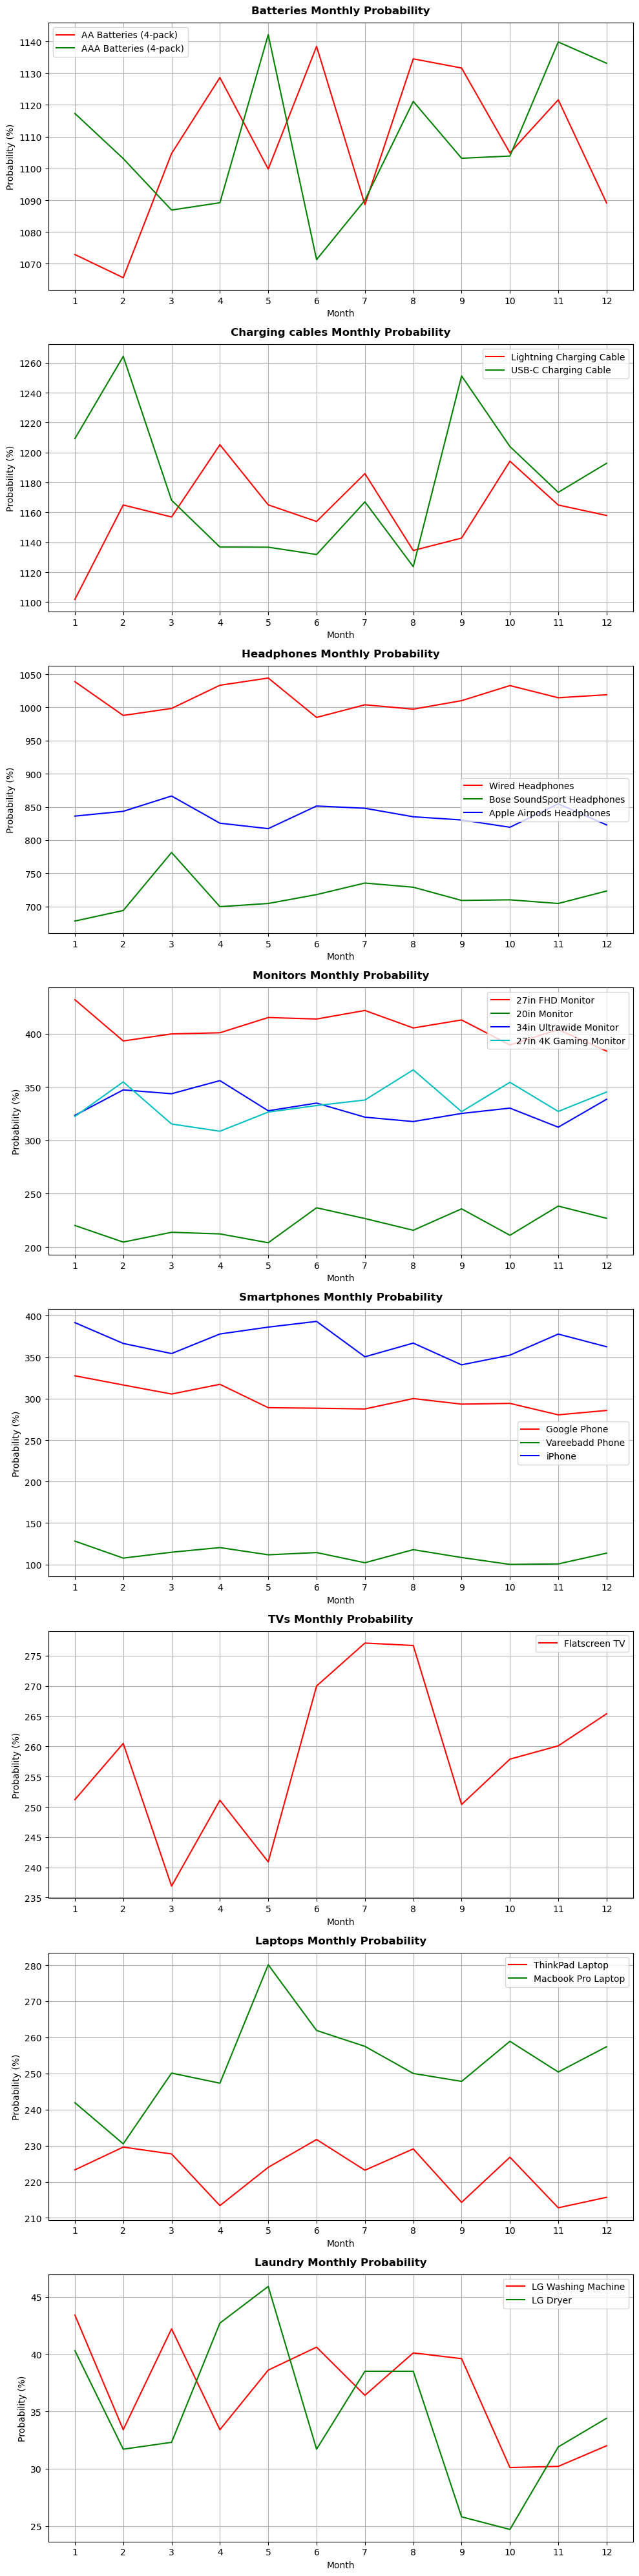

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Your proba_prod function goes here

categories = {
    "Batteries": ["AA Batteries (4-pack)", "AAA Batteries (4-pack)"],
    "Charging cables": ["Lightning Charging Cable", "USB-C Charging Cable"],
    "Headphones": ["Wired Headphones", "Bose SoundSport Headphones", "Apple Airpods Headphones"],
    "Monitors": ["27in FHD Monitor", "20in Monitor", "34in Ultrawide Monitor", "27in 4K Gaming Monitor"],
    "Smartphones": ["Google Phone", "Vareebadd Phone", "iPhone"],
    "TVs": ["Flatscreen TV"],
    "Laptops": ["ThinkPad Laptop", "Macbook Pro Laptop"],
    "Laundry": ["LG Washing Machine","LG Dryer"],
}

# Define a list of line colors
line_colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

fig, axes = plt.subplots(len(categories), figsize=(10, 5 * len(categories)))

for i, (category, products) in enumerate(categories.items()):
    ax = axes[i]
    product_probs = []
    
    for product, color in zip(products, line_colors):
        product_prob, _ = proba_prod([product])
        ax.plot(range(1, 13), product_prob * 100, label=product, color=color)
    
    ax.set_title(f'{category} Monthly Probability', weight='bold', fontsize=12, pad=10)
    ax.grid()
    ax.set_xticks(range(1, 13))
    ax.set_xlabel('Month')
    ax.set_ylabel('Probability (%)')
    ax.legend()

plt.tight_layout()
plt.show()


In [33]:
def statistical_probability(frequency, total_frequency):
    return frequency / total_frequency

# Extract unique products from your dataset's "Product" column
products = df['Product'].unique()

# Calculate the total product probability
product_prob = df['Product'].count()  # Total number of products in the dataset

for product in products:
    product_frequency = df[df['Product'] == product]['Product'].count()  # Count occurrences of the product
    
    # Calculate the probability for the current product
    p_product = statistical_probability(product_frequency, product_prob)
    Pprime_product = 1 - p_product
    
    print(f"Probability of the Customers that will order {product}: {p_product:.2%}")
    print(f"Probability of the Customers that will not order {product}: {Pprime_product:.2%}")

Probability of the Customers that will order Macbook Pro Laptop: 2.54%
Probability of the Customers that will not order Macbook Pro Laptop: 97.46%
Probability of the Customers that will order ThinkPad Laptop: 2.22%
Probability of the Customers that will not order ThinkPad Laptop: 97.78%
Probability of the Customers that will order iPhone: 3.68%
Probability of the Customers that will not order iPhone: 96.32%
Probability of the Customers that will order Google Phone: 2.97%
Probability of the Customers that will not order Google Phone: 97.03%
Probability of the Customers that will order Vareebadd Phone: 1.11%
Probability of the Customers that will not order Vareebadd Phone: 98.89%
Probability of the Customers that will order 27in 4K Gaming Monitor: 3.35%
Probability of the Customers that will not order 27in 4K Gaming Monitor: 96.65%
Probability of the Customers that will order 34in Ultrawide Monitor: 3.32%
Probability of the Customers that will not order 34in Ultrawide Monitor: 96.68%
Pro

In [35]:
def proba_prod(product):
    product_size = df.shape[0]
    product_size1 = df[df.Product == product]
    product_size_ = product_size1.shape[0]
    prob_year = round(product_size_/product_size*100,2)
    
    product_month = []
    product_month1 = []
    prob_month = []
    for i in range(1,13):
        prod_size = df[df['Month']==i].shape[0]
        product_month.append(prod_size)
        prod_size1 = product_size1[product_size1['Month']==i].shape[0]
        product_month1.append(prod_size1)
    for a,b in zip(product_month1, product_month):
        prob = round(a/b,3)
        prob_month.append(prob)
    return np.array(prob_month),prob_year

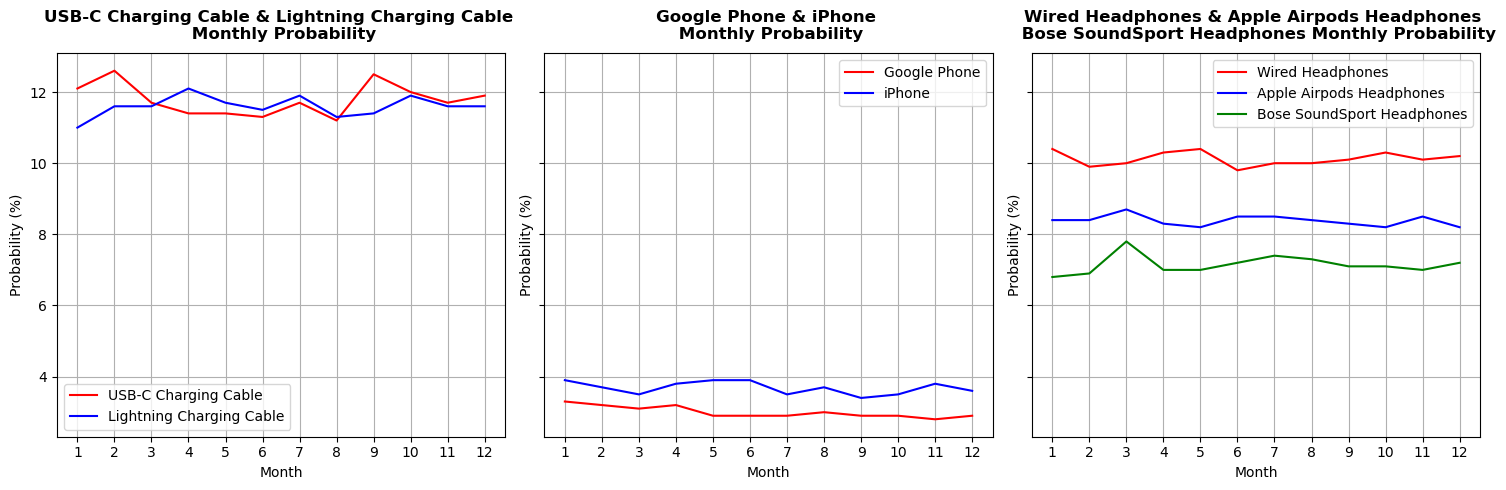

Probability in year USB-C Charging Cable : 11.78
Probability in year Lightning Charging Cable : 11.65
Probability in year Google Phone : 2.97
Probability in year iPhone : 3.68
Probability in year Wired Headphones : 10.16
Probability in year Apple Airpods Headphones : 8.36
Probability in year Bose SoundSport Headphones : 7.17


In [36]:
fig, ax = plt.subplots(1,3,figsize=(15,5),sharey=True)
prod1 = 'USB-C Charging Cable'
ax[0].plot(range(1,13),(proba_prod(prod1)[0]*100),label='USB-C Charging Cable',color='r')
prod2 = 'Lightning Charging Cable'
ax[0].plot(range(1,13),(proba_prod(prod2)[0]*100),label='Lightning Charging Cable',color='b')
# ax[0].set_ylim(0,15)
ax[0].set_title(f'{prod1} & {prod2} \n Monthly Probability',weight='bold',fontsize=12,pad=10)
ax[0].grid()
ax[0].set_xticks(range(1,13))
ax[0].set_xlabel('Month')
ax[0].set_ylabel('Probability (%)')
ax[0].legend()



prod1 = 'Google Phone'
ax[1].plot(range(1,13),(proba_prod(prod1)[0]*100),label='Google Phone',color='r')
prod2 = 'iPhone'
ax[1].plot(range(1,13),(proba_prod(prod2)[0]*100),label='iPhone',color='b')
# ax[1].set_ylim(0,6)
ax[1].set_title(f'{prod1} & {prod2} \n Monthly Probability',weight='bold',fontsize=12,pad=10)
ax[1].grid(True)
ax[1].set_xticks(range(1,13))
ax[1].set_xlabel('Month')
ax[1].set_ylabel('Probability (%)')
ax[1].legend()

prod1 = 'Wired Headphones'
ax[2].plot(range(1,13),(proba_prod(prod1)[0]*100),label='Wired Headphones',color='r')
prod2 = 'Apple Airpods Headphones'
ax[2].plot(range(1,13),(proba_prod(prod2)[0]*100),label='Apple Airpods Headphones',color='b')
prod3 = 'Bose SoundSport Headphones'
ax[2].plot(range(1,13),(proba_prod(prod3)[0]*100),label='Bose SoundSport Headphones',color='g')
# ax[2].set_ylim(0,12)
ax[2].set_title(f'{prod1} & {prod2} \n {prod3} Monthly Probability',weight='bold',fontsize=12,pad=10)
ax[2].grid(True)
ax[2].set_xticks(range(1,13))
ax[2].set_xlabel('Month')
ax[2].set_ylabel('Probability (%)')
ax[2].legend()

plt.tight_layout()
plt.show()

prods =['USB-C Charging Cable', 'Lightning Charging Cable','Google Phone','iPhone',
        'Wired Headphones','Apple Airpods Headphones','Bose SoundSport Headphones']
for i in prods:
    print(f'Probability in year {i} : {proba_prod(i)[1]}')